# Gradient descent on a cost function (including mistakes)

This illustrates how gradient descent works without getting too complicated — it's the same as the [previous notebook](gradient_descent_x2.ipynb), except we now take an ~~arbitrary~~ function and gently turn our attention to derivatives.

## Derivatives
We need the derivative of whatever function we choose. This is to calculate the gradient at any point, which determines the step size.

I used [this video tutorial](https://www.youtube.com/watch?v=5yfh5cf4-0w) on derivatives, but didn't go into the detail. Understanding the first 5-10 minutes is enough.

## Cost function and its derivative
We're still not going to use a proper cost function as part of a ML algorithm. This is just about understanding the principle of gradient descent to get my head around it. The principle can then be built upon and applied to any cost function.

Let's choose the function: 
$$ 3x^{3} - 2x + 7 $$

The derivative is:

$$ \frac{d}{d\theta}J(\theta) = 3 \times 3x^{2} - 2 \times 1 + 0 $$

or

$$ \frac{d}{d\theta}J(\theta) = 9x^{2} - 2 $$

I grabbed this function from [another YouTube tutorial](https://youtu.be/1mHbdWOR9iM?t=82) to be sure I got it right.

In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [49]:
def f(x):
    # the function we're going to try to find a minimum value for
    return 3 * x**3 - 2 * x + 7

## What a stupid idea...

I was getting crazy results, and realised that I should plot the function to see what was happening.

When you plot this function, though, you see that it's easy to get smaller and smaller, but you can't _minimise_. The exercise is to find at least a local minimum, but there is no minimum for this function.

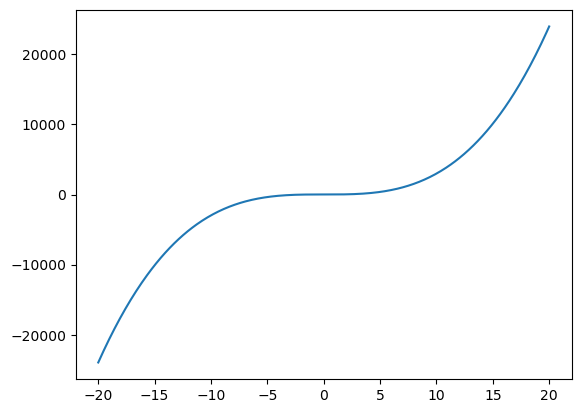

In [50]:
# plot f(x)
x = np.linspace(-20, 20, 500)
y = f(x)
plt.plot(x, y)

## Modified function

We can try just using an even exponent in the function (i.e. $ x^{4} $ not $ x^{3} $) and see if that gets us a more suitable function.

$ 3x^{4} - 2x + 7 $

In [51]:
def f(x):
    return 3 * x**4 - 2 * x + 7

This means the derivative is now:

$ 12x^{3} - 2 $

### Plot the new $ f(x) $

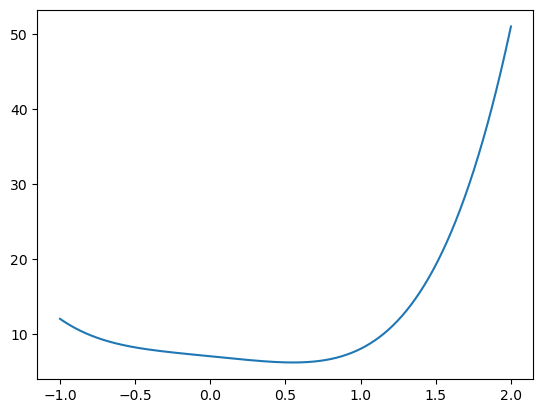

In [52]:
# plot f(x)
x = np.linspace(-1, 2, 500)
y = f(x)
plt.plot(x, y)

That's more like it. Now let's define our derivative function, because we'll need this later.

## The derivative function

To recap, this gives us the gradient for any value of $ x $.
* We need this to adjust the size of the step we take. Think about it — with a steep gradient, a small step to one side will take you a long way down the y-axis. Stepping from 2.0 to 1.5 on the chart above will take the y down from around 50 to about 13. From 1.0 to 0.5, it stays nearly the same.
* We also need to know the direction – this is different depending on whether we start on the left (e.g. x = -15 on the chart) or right (e.g. x = 15)

In [53]:
def deriv(x):
    return 12 * x**3 - 2

## Set our parameters... sorry, "hyperparameters"

In ML speak, these are hyperparameters. We're not doing machine learning here, because this is just a demonstration of gradient descent. But when we plug it into machine learning algorithms, the parameters are the variables (height, weight, age ...) and hyperparameters are like external meta-factors that determine how the model learns. In this case, where to start ($ \theta $), how fast to learn ( $ \alpha $) or the *learning rate*, and how many iterations to keep going for.

In [54]:
# alpha / learning rate
alpha = 0.05

# theta, i.e. starting point
theta = -.1

# define no. iterations
iterations = 100

df = pd.DataFrame({"Theta": [np.nan] * iterations})
df["Cost"] = np.nan
df.at[0, "Theta"] = theta
df

,Theta,Cost
0,-0.1,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
95,NaN,NaN
96,NaN,NaN
97,NaN,NaN
98,NaN,NaN


In [55]:
def step(theta, alpha):
    # the step function, which tells us how big a step to take next (and in which direction)
    cost = f(theta)
    new_theta = theta - alpha * deriv(theta)
    return cost, new_theta

def gradient_descent(df, alpha):
    # the main function, that runs through as many iterations as we want (i.e. row in the DataFrame) and updates accordingly
    for i, row in df.iterrows():
        theta = df.at[i, "Theta"]
        cost, new_theta = step(theta, alpha)
        df.at[i, "Cost"] = cost
        # get the index of the next row, and update the next theta if we're not on the last row
        next_i = i + 1
        if next_i in df.index: df.at[next_i, "Theta"] = new_theta

# call the gradient descent function with the arguments specified above
gradient_descent(df, alpha)

In [56]:
df

,Theta,Cost
0,-0.100000,7.200300
1,0.000600,6.998800
2,0.100600,6.799107
3,0.199989,6.604821
4,0.295190,6.432399
...,...,...
95,0.550321,6.174518
96,0.550321,6.174518
97,0.550321,6.174518
98,0.550321,6.174518


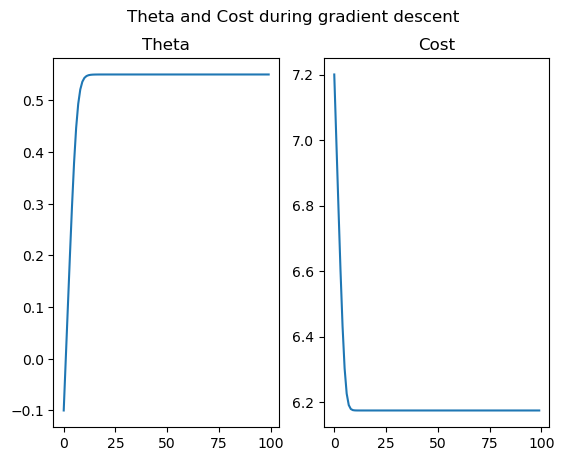

In [57]:
def charts(df):
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(df["Theta"])
    axs[0].set(title="Theta")
    axs[1].plot(df["Cost"])
    axs[1].set(title="Cost")
    fig.suptitle("Theta and Cost during gradient descent")
charts(df)

## A little tuning
Looking at the charts, we were nearly there after about 10 iterations. So we can reduce the number to 10 and see what happens.

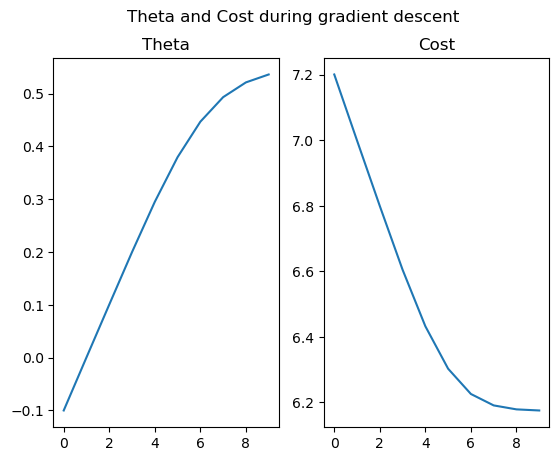

In [58]:
# alpha / learning rate
alpha = 0.05

# theta, i.e. starting point
theta = -.1

# define no. iterations
iterations = 10

df2 = pd.DataFrame({"Theta": [np.nan] * iterations})
df2["Cost"] = np.nan
df2.at[0, "Theta"] = theta

gradient_descent(df2, alpha)
charts(df2)

### See whether it made much difference

Let's compare the results from the first run and the second. I kept them in separate DataFrames precisely for that purpose!

In [60]:
print(f"Cost after 100 iterations: {round(df.at[99, 'Cost'], 3)}")
print(f"Cost after 10 iterations: {round(df2.at[9, 'Cost'], 3)}")

Cost after 100 iterations: 6.175
Cost after 10 iterations: 6.176


As you can see, the extra 90 iterations didn't make a great deal of difference.